## Fast.Ai - Lesson 1: Image Classification ##

### Lego Classification using Fast.Ai

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision.all import *
from fastai.imports import *
from fastai.vision.data import *
from fastai import *
import numpy as np
import fastai

In [3]:
print(fastai.__version__)

2.0.12


In [42]:
path = Path("data/Lego")
path.ls()


(#30) [Path('data/Lego/Aunt May'),Path('data/Lego/Black Widow'),Path('data/Lego/Captain America'),Path('data/Lego/Cara Dune'),Path('data/Lego/export.pkl'),Path('data/Lego/Fire-fighter'),Path('data/Lego/General Grievous'),Path('data/Lego/Ghost Spider'),Path('data/Lego/Harry Potter'),Path('data/Lego/Iron Man MK 1')...]

In [43]:
np.random.seed(42)
#data = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2, size=256, num_workers=4).normalize(imagenet_stats)
data = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2, item_tfms=RandomResizedCrop(512, min_scale=0.75),
                                    bs=32,batch_tfms=[*aug_transforms(size=256, max_warp=0), Normalize.from_stats(*imagenet_stats)],num_workers=0)


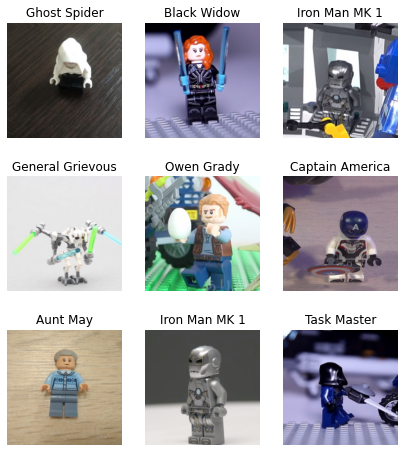

In [44]:
data.show_batch(nrows=3, figsize=(7,8))

### Trainining the model

In [45]:
learn = cnn_learner(data, resnet50, metrics=error_rate)

In [46]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.323635,3.036434,0.783333,00:04
1,2.762587,1.083066,0.333333,00:04
2,1.890998,0.703558,0.266667,00:04
3,1.409508,0.639849,0.183333,00:04


In [47]:
learn.save('50_2_Stage -1')

Path('data/Lego/models/50_2_Stage -1.pth')

In [48]:
learn.unfreeze()

SuggestedLRs(lr_min=0.00020892962347716094, lr_steep=2.75422871709452e-06)

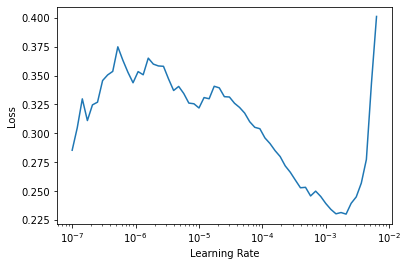

In [49]:
learn.lr_find()

In [50]:
learn.load('50_2_Stage -1')

In [52]:
learn.fit_one_cycle(2, lr_max=slice(3e-5,2e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.064799,0.385509,0.100000,00:04
1,0.075001,0.396982,0.100000,00:04


In [53]:
learn.save("50_2_Stage -2")

Path('data/Lego/models/50_2_Stage -2.pth')

In [54]:
learn.load("50_2_stage -2")

In [55]:
learn.model = learn.model.cpu()

In [56]:
learn.export()

In [57]:
defaults.device = torch.device('cpu')

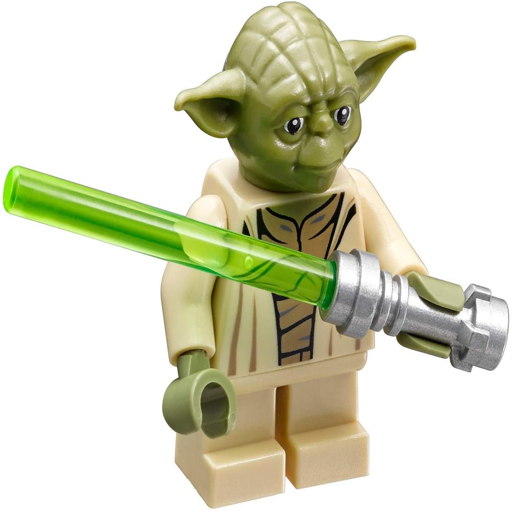

In [87]:
img = Image.open('Test/Lego/test_02.jpg')
img
#img.resize((512,512))

In [88]:
l = load_learner(path/'export.pkl', cpu=True)

In [89]:
defaults.device  = torch.device('cpu')
defaults.device

device(type='cpu')

In [92]:
fnames=get_image_files('Test/Lego/')
#fnames
pred_class,pred_idx,outputs = l.predict(fnames[1])
pred_class

'Yoda'

In [93]:
l.dls.c

26